# 1. K-means 알고리즘 이해

와인 데이터셋을 이용한 군집화

## 1-1. 와인 데이터 세트 불러오기

In [ ]:
# 필요한 라이브러리 임포트
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
# 와인 데이터셋 로드
wine = load_wine()

# DataFrame 변환
wineDF = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# 변환된 데이터프레임 확인
wineDF.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


## 1-2.데이터 스케일링 및 K-means 모델 생성하고 학습하기

kmeans 파라미터 : n_cluster = 3, 최대 반복 횟수 = 300, 초기 중심 설정 방식은 디폴트 값

In [ ]:
#kmeans 객체 만들기
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wineDF)

kmeans.fit(wine_scaled)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# KMeans의 labels_ 속성값 확인해보기
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## 1-3. 군집화가 효과적으로 됐는지 확인해보기

In [ ]:
#와인 데이터 세트의 target 값을 'target' 칼럼으로
wineDF['target'] = wine.target
#앞에서 구한 labels_값을 'cluster' 칼럼으로 지정
wineDF['cluster'] = kmeans.labels_
# GroupBy 연산을 통해 비교
wine_result = wineDF.groupby(['target', 'cluster'])[wine.feature_names[0]].count()
print(wine_result)

target  cluster
0       2          59
1       0          65
        1           3
        2           3
2       1          48
Name: alcohol, dtype: int64


해당 결과에 대해 각 군집에서 실제 품종의 데이터가 어떻게 분포하는지 설명해주세요.

답안 : Target으로 0값을 가지는 데이터는 2번 군집에 59개 전부 잘 분류되었고, Target 1값을 가지는 데이터는 3개가 군집 1, 또 3개가 군집 2로 분류되었고 나머지는 군집 0에 분류되었다. Target 2값을 가지는 데이터는 군집 1에 전부 잘 분류되었다.

## 1-4. 붓꽃 데이터 세트의 군집화를 시각화





2개의 차원으로 축소하기

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA를 이용한 차원 축소 (2개의 차원으로 축소)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(wine_scaled)


wineDF['pca_x'] = pca_transformed[:, 0]
wineDF['pca_y'] = pca_transformed[:, 1]

# PCA 변환 결과 확인
wineDF.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,2,3.316751,1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2,2.209465,-0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,2,2.516740,1.031151


군집 결과 시각화

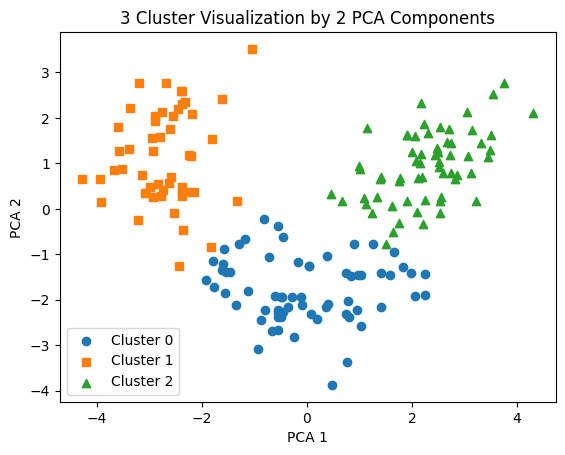

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스 추출
marker0_ind = wineDF[wineDF['cluster'] == 0].index
marker1_ind = wineDF[wineDF['cluster'] == 1].index
marker2_ind = wineDF[wineDF['cluster'] == 2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각  군집 레벨의 pca_x, pca_y 값 추출.o,s,^ 로 마커 표시
plt.scatter(x=wineDF.loc[marker0_ind, 'pca_x'], y=wineDF.loc[marker0_ind, 'pca_y'], marker='o', label='Cluster 0')
plt.scatter(x=wineDF.loc[marker1_ind, 'pca_x'], y=wineDF.loc[marker1_ind, 'pca_y'], marker='s', label='Cluster 1')
plt.scatter(x=wineDF.loc[marker2_ind, 'pca_x'], y=wineDF.loc[marker2_ind, 'pca_y'], marker='^', label='Cluster 2')

# 시각화
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.legend()
plt.show()

# 2. 군집 평가

## 2-1. 실루엣 계수 값이 무엇을 의미하는지 설명해주세요.

답안 : 실루엣 계수는 개별 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표이다.

## 2-2. 와인 데이터 세트를 이용한 군집 평가

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#1번에서 만든 kmeans 객체, wineDF, wine_scaled 이용 (1번 문제를 푼 후 실행해주세요)
# 모든 개별 데이터의 실루엣 계수 값을 계산
score_samples = silhouette_samples(wine_scaled, wineDF['cluster'])

# 실루엣 계수 값을 DataFrame에 추가
wineDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값 계산
average_score = silhouette_score(wine_scaled, wineDF['cluster'])

# 평균 실루엣 계수 출력
print('와인 데이터 세트 Silhouette Analysis Score：{0:.3f}'.format(average_score))

#클러스터별 평균 실루엣 계수 계산
wineDF.groupby('cluster')['silhouette_coeff'].mean()

와인 데이터 세트 Silhouette Analysis Score：0.285


,silhouette_coeff
cluster,
0,0.177409
1,0.350622
2,0.343413


다음 코드를 실행하여 실루엣 계수를 면적으로 시각화한 함수를 정의해주세요.

In [ ]:
def visualize_silhouette(cluster_lists, X_features):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

## 2-3. make_blobs(), 군집 실루엣 계수 평균값 시각화

make_blobs() 파라미터 설정

- 생성할 총 데이터 개수 = 500개
- 군집의 개수 = 4
- 생성될 군집 데이터의 표준편차 = 1
- 데이터 피처 개수 = 2

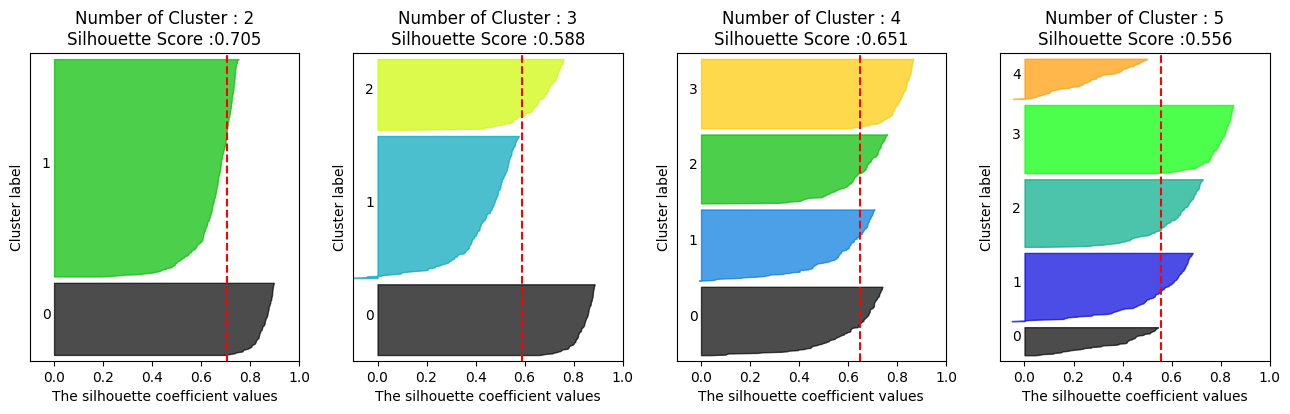

In [ ]:
#make_blobs()를 통해 데이터 세트 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0,
                center_box=(-10.0,10.0), shuffle=True, random_state=1)

#군집 개수가 2개, 3개, 4개, 5개일 때 군집 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

# 3. 평균이동(MeanShift)

##    3-1. 대역폭 계산 함수를 이용하여 최적의 bandwidth 값 찾기

In [ ]:
# 실행

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=400, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth = 0.8)
cluster_labels = meanshift.fit_predict(X)

In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.825


##    3-2. 대역폭(Bandwidth)의 역할에 대해 서술하세요.

대역폭의 역할과 그 값의 크기에 따라 확률 밀도 추정 성능이 어떻게 변하는지에 대해 작성해주시면 됩니다.

답안 대역폭은 KDE 형태를 부드럽거나 뾰족한 형태로 smoothing하는 데 적용된다. 대역폭이 좁으면 데이터에 오버피팅이 적용될 수 있고, 너무 넓으면 과소적합이 일어날 수 있다.

##     3-3. 군집화 결과 시각화 하기.

 cluster_center_ 속성을 이용하여 군집 중심 좌표도 표시하세요

In [ ]:
# 실행

import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)

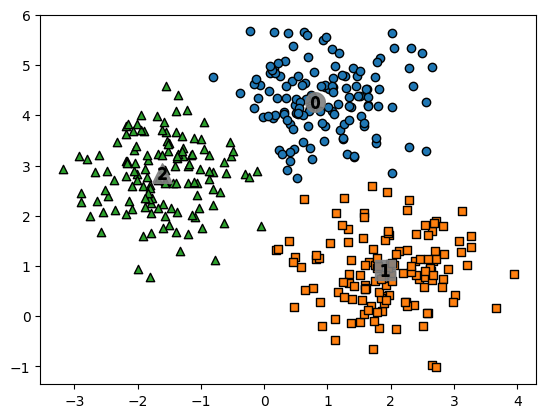

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]

    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor = 'k',  marker='$%d$' % label)

plt.show()

#    04. GMM(Gaussian Mixture Model)

## 4-1. GMM의 모수 추정에서 추정하는 두 가지를 서술하시오.

개별 정규 분포의 평균과 분산, 각 데이터가 어떤 정규 분포에 해당되는지 확률을 추정한다.

##    4-2. 다음 조건을 만족하는 GMM 군집화를 수행하시오.


- gaussian mixture 모델의 총 개수 = 5


In [ ]:
#실행

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepla_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              32
        4              14
        3               4
2       3              33
        2              17
Name: count, dtype: int64


# 05. DBSCAN

##    5-1. 입실론 주변 영역 내의 최소 데이터 개수를 충족시키는가에 따를 데이터 포인트 4가지에 대해 서술하시오.

1. 핵심 포인트(Core point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우

2. 이웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터

3. 경계 포인트(Border Point): 핵심 포인트가 아니지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터

4. 잡음 포인트(Noise Point): 핵심 포인트가 아니고 핵심 포인트를 이웃 포인트로 가지고 있지도 않은 데이터

##    5-2. DBSCAN 클래스를 이용해 다음 조건을 만족하는 군집화를 수행하시오.

- eps =0.5
- min_samples = 10

In [ ]:
# 실행

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                28
        -1                22
Name: count, dtype: int64


##    5-3. 위의 군집화 결과를 다음 조건을 만족하게 시각화 하시오.

- PCA를 이용해 2개의 feature로 압축 변환
- visualize_cluster_plot() 함수 사용
- ftr1, ftr2 칼럼에 변환된 feature 데이터 세트 입력

In [ ]:
# 실행
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

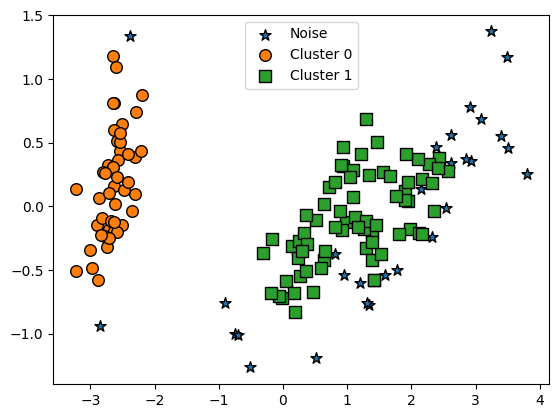

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

# 6. 병합 군집 & 계층적 군집 개념

발표 자료를 참고하여 답안을 작성해주세요.

## 6.1 병합 군집의 linkage 옵션 4가지에 대해 간단하게 서술하세요.

답:

- single(minimum): 최소 거리가 가장 짧은 두 클러스터를 병합하기
- complete(maximum): 최대 거리가 가장 짧은 두 클러스터를 병합하기
- average: 평균 거리가 가장 짧은 두 클러스터를 병합하기
- ward: 분산을 가장 작게 증가시키는 두 클러스터를 병합하기

## 6.2 개체들이 결합되는 순서를 나타내는 트리 형태의 구조를 무엇이라고 할까요?

답: 덴드로그램(Dendrogram)

#7. 군집화 실습 - 고객 세그먼테이션

## 7.1 RFM기법이란? (R,F,M에 대한 의미 설명)

답:고객의 행동 패턴을 분석해 고객을 세분화하는 마케팅 분석 기법

- recency(R): 가장 최근 상품 구입일에서 오늘까지의 기간
- frequency(F): 상품 구매 횟수
- monetary value(M): 총 구매 금액

## 데이터 다운로드 후, 파일 경로를 지정해주세요.

데이터 셋 다운로드:
https://archive.ics.uci.edu/dataset/352/online+retail

In [9]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df=pd.read_excel(io='/content/drive/MyDrive/Euron Homework/kaggle/Online Retail.xlsx')
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


##7.2 불린 인덱싱을 사용해 Quantity > 0, UnitPrice > 0, CustomerID 가 Not Null인 값만 필터링하는 코드를 작성하세요

In [10]:
retail_df=retail_df[retail_df['Quantity'] > 0]
retail_df=retail_df[retail_df['UnitPrice'] > 0]
retail_df=retail_df[retail_df['CustomerID'].notnull()]
retail_df=retail_df[retail_df['Country']=='United Kingdom']

## 7.3 retail_df의 feature들을 이용하여 RMF 기반의 수행을 위해 데이터를 가공해야합니다. retail_df의 feature들을 이용하여 sale_amount라는 새로운 feature를 생성하세요.

In [11]:
retail_df['sale_amount']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df['CustomerID']=retail_df['CustomerID'].astype(int)

## 7.4 주문번호 기준의 retail_df를 개별 고객 기준으로 DataFrame을 새롭게 생성하겠습니다. 주석을 참고하여 답안을 작성해주세요.

In [12]:
# 어떤 aggregation 함수를 사용할지 작성
aggregations={'InvoiceDate':'max','InvoiceNo':'count','sale_amount':'sum'}
cust_df=retail_df.groupby('CustomerID').agg(aggregations)

# groupby된 결과 칼럼 값을 Recency, Frequnecy, Monetary로 변경
cust_df=cust_df.rename(columns={ 'InvoiceDate':'Recency',
                                'InvoiceNo':'Frequency','sale_amount':'Monetary'})
cust_df=cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


## 7.5 Recency 칼럼의 의미를 생각하며 Recency 칼럼을 추가로 가공해보세요. (조건 - 오늘 날짜: 2011년 12월 10일)

In [13]:
import datetime as dt
cust_df['Recency']=dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency']=cust_df['Recency'].apply(lambda x:x.days+1)
print('cust_df 로우와 칼럼 건수는',cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


## 7.6 군집을 3개로 구성하는 KMeans를 수행하여 전체 군집의 평균 실루엣 계수인 실루엣 스코어를 구하세요.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

X_features=cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

kmeans=KMeans(n_clusters=3 ,random_state=0,n_init=10)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels

print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어 : 0.592


In [17]:
## 코드를 실행해주세요
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters = n_cluster, max_iter=500,n_init=10, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [18]:
## 코드를 실행해주세요
def visualize_kmeans_plot_multi(cluster_lists, X_features):

    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np

    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters = n_cluster, max_iter=500,n_init=10, random_state=0)

        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels

        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']

        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))
        axs[ind].legend(loc='upper right')

    plt.show()

<ipython-input-18-090033562771>:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
<ipython-input-18-090033562771>:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


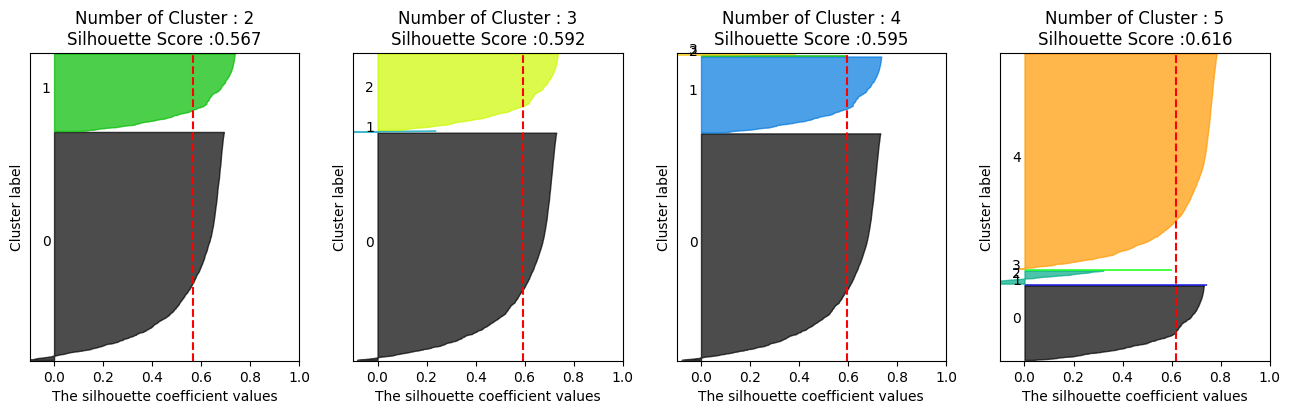

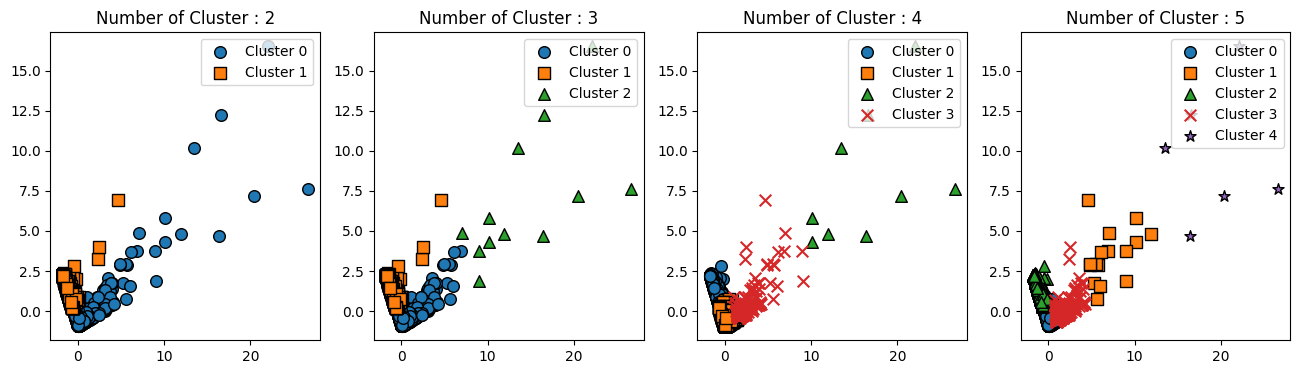

In [19]:
# 코드를 실행해주세요
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

## 7.7 시각화 결과를 바탕으로, 군집 수를 계속 늘리는 것이 좋은 방법일지 서술해주세요.

답: 군집 수를 증가시키면 데이터 세트의 수가 너무 작은 군집이 생성되면서, 군집 내부에서 데이터가 광범위하게 퍼지게 된다. 즉, 의미 없는 군집화가 반복된다.

## 7.8 데이터 세트의 왜곡 정도를 낮추기 위해 데이터를 어떻게 변환해야 할까요? 답안을 작성해주세요.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

cust_df['Recency_trans']=np.log1p(cust_df['Recency'])
cust_df['Frequency_trans']=np.log1p(cust_df['Frequency'])
cust_df['Monetary_trans']=np.log1p(cust_df['Monetary'])

X_features=cust_df[['Recency_trans','Frequency_trans','Monetary_trans']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

kmeans=KMeans(n_clusters=3,random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels

print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어 : 0.303


<ipython-input-18-090033562771>:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
<ipython-input-18-090033562771>:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


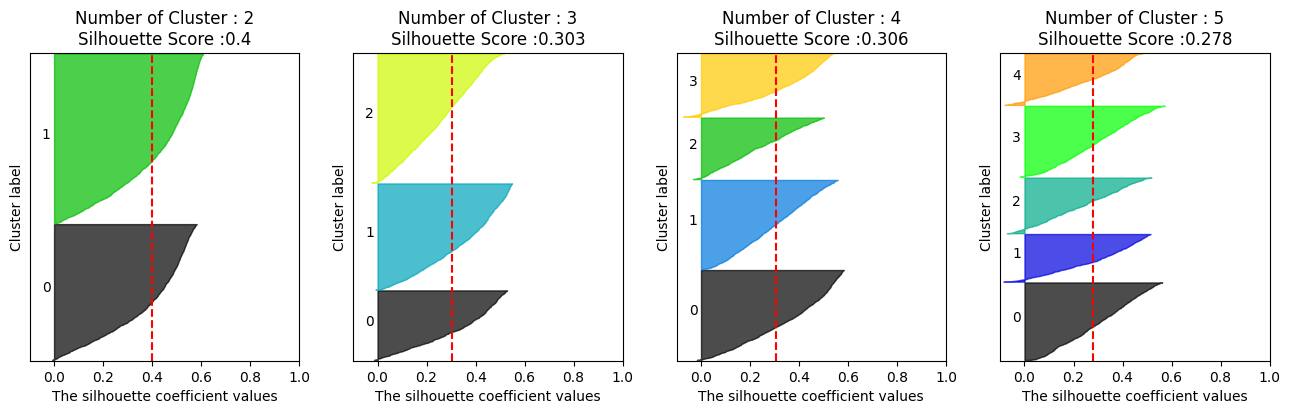

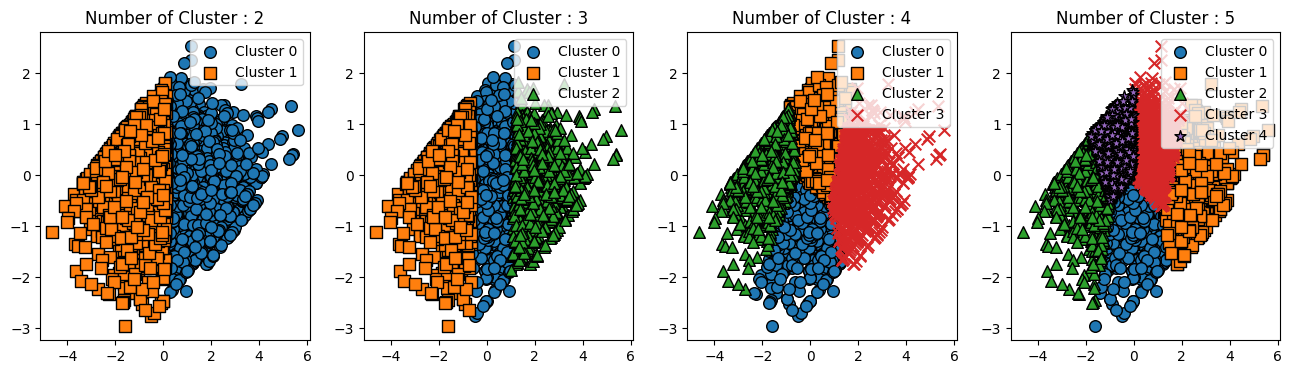

In [21]:
## 코드를 실행해주세요
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)